<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Christoph Berke </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060"> Vorlesung &mdash; Programmiertechniken 10 </h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2023</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Themen dieses Notebooks**: <span style="color:#606060">  </span> 
Grundlagen neuronaler Netze, backpropagation
<hr style="height:.3px">

# Teil I &mdash; Neuronales Netz mit Optimierung durch "backpropagation"

In diesem ersten Tutorium zu maschinellem Lernen wollen wir ein künstliches neuronales Netzwerk darauf trainieren, die Ziffern $0$ und $1$ unterscheiden zu können. Dabei lernen wir den "backpropagation" Algorithmus kennen.

In [ ]:
using CairoMakie
using LaTeXStrings

### Input erzeugen
Der Input sind eine graphische Repräsentation der Ziffern "0" und "1", die wir in zwei Arrays speichern. Für die folgende Optimierung werden diese zu einer Matrix verbunden:

In [ ]:
zero = [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1];
one = [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0];

input_data = hcat(zero, one)';
target_data = [0; 1]

### Visualisierung

In [ ]:
fig = Figure(resolution = (600, 300))
ax, p = heatmap(fig[1, 1], reshape(zero, 5, 5), colormap = :binary)
hidedecorations!(ax)
ax, p = heatmap(fig[1, 2], reshape(one, 5, 5), colormap = :binary)
hidedecorations!(ax)
fig

### Aktivierungsfunktion

Als Aktivierungsfunktion der Neuronen dient ein Sigmoid, beschrieben durch die Gleichung

\begin{equation}
\sigma(z) = \dfrac{1}{1 + e^{-z}},
\end{equation}

wobei in unserem Fall $z$ das Skalarprodukt $z = \textbf{x} \cdot \textbf{w}$ von Inputvektoren $\textbf{x}$ und Kantengewichten $\textbf{w}$ ist.

In [ ]:
sigmoid(z) = 1. / (1. + exp(-z))
s_prime(z) = sigmoid(z) * (1. - sigmoid(z));

In [ ]:
fig = Figure(resolution = (800, 400))
ax = Axis(fig[1, 1], xlabel = L"$z")
xs = range(-10, stop=10, length=100)
lines!(ax, xs, sigmoid.(xs), label=L"$\sigma(z)$")
lines!(ax, xs, s_prime.(xs), label=L"$\sigma^\prime(z)$")
axislegend(position = (0., 1))
ylims!(ax, -0.05, 1.05)
fig

### Neuronales Netz

Wir beginnen mit der einfachsten Variante eines neuronalen Netzes, welche  nur aus der Inputebene und der Outputebene besteht. Die beiden sind verbunden  über Gewichte $w_{i, j}$, die in einer Matrix $W$ gespeichert sind. Für unseren Fall genügt ein Outputneuron $o$, daher hat die Matrix die Dimension $(25, 1)$. 




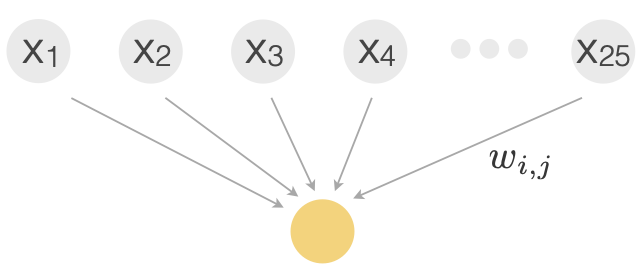

Die Optimierung wird über *backpropagation* unter Verwendung einer **quadratischen Kostenfunktion** $C$ durchgeführt, welche die Abweichung des Outputneurons $o$ vom tatsächlichen Wert $t$ misst:

\begin{equation}
C = \frac{1}{2}(t - o)^2
\end{equation}

Ausgehend von den aktuellen Gewichten wird die Ableitung dieser Kostenfunktion in Richtung der Gewichte berechnet:

\begin{equation}
\dfrac{\partial C}{\partial w_{ij}} = \dfrac{\partial C}{\partial o} \cdot\dfrac{\partial o}{\partial z}\cdot\dfrac{\partial z}{\partial w_{ij}}
\end{equation}

Der Reihe nach ergeben sich also die Terme
- Wie verändert sich der Fehler, wenn sich der Output des Neurons ändert?
- Wie ändert sich der Output, wenn sich das Skalarprodukt $z$ ändert?
- Wie ändert sich das Skalarprodukt $z = \textbf{x} \cdot \textbf{w}$, wenn sich das Gewicht ändert?

Die **Optimierung der Gewichte** erfolgt dann wie folgt:
\begin{equation}
\tilde{w}_{ij} = w_{i, j} - \gamma * \dfrac{\partial C}{\partial w_{ij}}
\end{equation}

Dabei haben wir die *Lernrate* $\gamma$ eingeführt.

**Initialisiere Gewichte**

In [ ]:
n_input = 25 # 25 Input-Neuronen
n_output = 1 # 1 Output

# Matrix W für die Gewichte zwischen Input und Output layer (25 x 1), 
# zufällig initialisiert zwischen -1 und 1.
W = 2 * (rand(n_input, n_output) .- 0.5) 

prob = round.(sigmoid.(input_data * W)[:], digits = 3)

println("Wahrscheinlichkeit, dass 0 als 0 erkannt wird : \t", 1-prob[1])
println("Wahrscheinlichkeit, dass 1 als 1 erkannt wird : \t", prob[2])

**Lernen**

In [ ]:
iterations = 1000
gamma = 0.1

for i in 1:iterations
    
    # Berechne die z-Werte für beide Trainingsdaten.
    z = input_data * W # [z0, z1] 
    
    # Berechne den Output für beide Trainingsdaten.
    result = sigmoid.(z) # [o0, o1] 
    
    # Abweichung (entspricht partieller Ableitung dC/do)
    err = result - target_data # [dC/do0, dC/do1]
    
    # Ableitung der Sigmoiden (entspricht partieller Ableitung do/dz)
    derivative = s_prime.(result) # [do0/dz0, do1/dz1]
   
    # Produkt der ersten beiden Ableitungen [dC/do0 * do0/dz0, dC/do1 * do1/dz1] = [deltaO(0), deltaO(1)]
    deltaO = err .* derivative
    
    # Update durch Matrixprodukt (entspricht dritter partieller Ableitung und Update)
    # Faktor 2 um über die beiden Input-Daten zu mitteln.
    W -= gamma * input_data' * deltaO / 2
    
end

In [ ]:
prob = round.(sigmoid.(input_data * W)[:], digits = 3)

println("Wahrscheinlichkeit, dass 0 als 0 erkannt wird : \t ", 1-prob[1])
println("Wahrscheinlichkeit, dass 1 als 1 erkannt wird : \t ", prob[2])

## Hidden layers

Das Einfügen von "versteckten Ebenen" zwischen der Input- und Outputebene, sogenannte *hidden layers*, kann dabei helfen Korrelationen aufzudecken, die sonst verborgen bleiben. Dazu wird einfach eine weitere Ebene von Neuronen zwischen Input und Output eingefügt und jedes Neuron aus dieser Ebene mit jeweils jedem Neuron der davor und dahinter liegenden Ebene verbunden. 

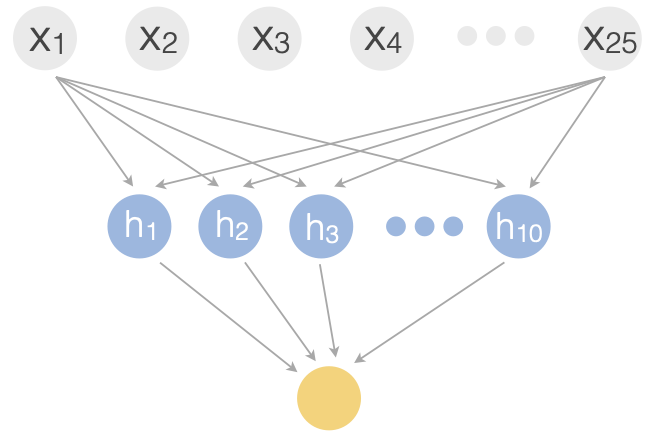

Die Optimierung geschieht ausgehend von der Outputebene und nach genau dem gleichen Prinzip wie zuvor.

In [ ]:
n_input = 25
n_hidden = 10
n_output = 1

# Matrix des hidden layers (Gewichte der Verbindungen zwischen hidden und input)
H = 2 * (rand(n_input, n_hidden) .- 0.5);

# Matrix des output layers (Gewichte der Verbindungen zwischen output und hidden)
O = 2 * (rand(n_hidden, n_output) .- 0.5);

prob = round.(sigmoid.(sigmoid.(input_data * H) * O), digits=3)

println("Wahrscheinlichkeit, dass 0 als 0 erkannt wird : \t", 1-prob[1])
println("Wahrscheinlichkeit, dass 1 als 1 erkannt wird : \t", prob[2])


In [ ]:
iterations = 1000
gamma = 0.1

for i in 1:iterations
    
    # 1. Durchlauf durch das Netz von Vorne nach Hinten um alle zi und sigma(zi) zu berechnen.

    # Output hidden layer
    hidden = sigmoid.(input_data * H) # Dimension 2 x 10 
    # (2 Zeilen für Inputs 0 und 1, 10 Spalten für Output der 10 hidden neurons)
    
    # Final output.
    result = sigmoid.(hidden * O) # Dimension 1 x 2 (2 Resultate für 2 inputs)
    
    # 2. Durchlauf durch das Netz von Hinten nach Vorne um alle delta = dC/dz zu berechnen.
    # Berechne den Fehler (dC/dz) der output layer.
    result_err   = target_data .- result
    deltaOutput = result_err .* s_prime.(result)
    
    # Propagiere diesen Fehler durch den hidden layer
    hidden_err   = deltaOutput * O'
    deltaHidden = hidden_err .* s_prime.(hidden)
        
    # Update durch Matrixprodukt (entspricht dritter partieller Ableitung (x Output der vorherigen Layer, xi), 
    # Summe über Trainingsdaten und Update)
    O .+= gamma .* (hidden' * deltaOutput)
    H .+= gamma .* (input_data' * deltaHidden)
end

In [ ]:
prob = round.(sigmoid.(sigmoid.(input_data * H) * O), digits=3)

println("Wahrscheinlichkeit, dass 0 als 0 erkannt wird : \t", 1-prob[1])
println("Wahrscheinlichkeit, dass 1 als 1 erkannt wird : \t", prob[2])

## Einfluss der Lernrate $\gamma$

Wir können den Lernprozess noch durch das Einführen einer *Lernrate* anpassen. Dazu verändern wir die Gewichte genau in die Richtung, die durch den Gradienten vorgegeben wird, gewichtet mit einem Faktor $\gamma$:

\begin{equation}
\tilde{w}_{ij} = w_{i, j} - \gamma * \dfrac{\partial C}{\partial w_{ij}}
\end{equation}

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1], yscale = log10, xlabel = "Iteration", ylabel = L"Error $E$")
plots = []

iterations = 10000
gammas = [0.0001, 0.001, 0.01, 0.1, 0.25, 1.0, 10.0, 100.0]
cm = resample_cmap(:winter, length(gammas))

for (g, gamma) in enumerate(gammas)
    
    n_input  = 25
    n_hidden = 10
    n_output = 1

    H = 2 * (rand(n_input, n_hidden)  .- 0.5);
    O = 2 * (rand(n_hidden, n_output) .- 0.5);

    errors   = Float64[]
    x_values = Float64[]
    for i in 1:iterations
        hidden = sigmoid.(input_data * H)
        result = sigmoid.(hidden * O)
        
        result_err = target_data .- result
        
        if mod(i, 100) == 0
            push!(errors, sum(0.5 .* result_err.^2))
            push!(x_values, i)
        end
        result_delta = result_err .* s_prime.(result)

        hidden_err   = result_delta * O'
        hidden_delta = hidden_err .* s_prime.(hidden)

        O .+= gamma .* (hidden' * result_delta)
        H .+= gamma .* (input_data' * hidden_delta)
    end
    
    p = lines!(
        ax, x_values, errors, 
        linewidth=2, label=latexstring(L"$\gamma=", string(gamma), L"$"), 
        color = cm[g]
    )
    push!(plots, p)
end
Legend(fig[1, 2], ax)
fig